In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [3]:
df = pd.read_csv('train_loan_data.csv')

In [4]:
df.columns


Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [5]:
df.shape


(80000, 28)

In [6]:
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid
2,FL,60000.0,Aug-2007,10+ years,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199.0,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid
3,IL,100742.0,Sep-1980,10+ years,printer,664.0,660.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425.0,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid
4,MD,80000.0,Jul-1999,10+ years,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,0.0,debt_consolidation,34370.0,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  float64
 6   fico_range_low        80000 non-null  float64
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  float64
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [8]:
#Null percent
Nan_per = df.isnull().sum()/df.shape[0]*100
Nan_per.round(2)

addr_state              0.00
annual_inc              0.00
earliest_cr_line        0.00
emp_length              5.74
emp_title               6.27
fico_range_high         0.00
fico_range_low          0.00
grade                   0.00
home_ownership          0.00
application_type        0.00
initial_list_status     0.00
int_rate                0.00
loan_amnt               0.00
num_actv_bc_tl          4.93
mort_acc                3.46
tot_cur_bal             4.93
open_acc                0.00
pub_rec                 0.00
pub_rec_bankruptcies    0.04
purpose                 0.00
revol_bal               0.00
revol_util              0.07
sub_grade               0.00
term                    0.00
title                   1.21
total_acc               0.00
verification_status     0.00
loan_status             0.00
dtype: float64

# Imputation for Null Value Treatment

Emp_length

In [9]:
#Employee tenure
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

In [10]:
df['emp_length'].unique()

array(['10+ years', '3 years', '< 1 year', '1 year', '8 years', '7 years',
       '4 years', '2 years', '5 years', '6 years', '9 years'],
      dtype=object)

In [11]:
df['emp_length'].replace({'10+ years':'10','< 1 year':'0'},inplace =True)

In [12]:
df['emp_length'].unique()

array(['10', '3 years', '0', '1 year', '8 years', '7 years', '4 years',
       '2 years', '5 years', '6 years', '9 years'], dtype=object)

In [13]:
df['emp_length'] = df['emp_length'].str.extract('(\d+)')

In [14]:
df['emp_length'] = df['emp_length'].astype(int)

In [15]:
df['emp_length'].unique()

array([10,  3,  0,  1,  8,  7,  4,  2,  5,  6,  9])

In [16]:
df['emp_length'].value_counts()

10    30866
2      7319
3      6474
0      6297
1      5294
5      5094
4      4763
6      3691
7      3597
8      3583
9      3022
Name: emp_length, dtype: int64

emp_title 

In [17]:

title = list(df['emp_title'].unique())
df['emp_title'].value_counts()


Teacher                         1278
Manager                         1194
Owner                            592
RN                               526
Registered Nurse                 517
                                ... 
Support Services Coordinator       1
C&E Auburn V-Twin, Inc.            1
Media manager                      1
MERCHANDISER                       1
Sports Group Manager               1
Name: emp_title, Length: 36661, dtype: int64

In [19]:
#Employee title has too many diverse values and there is no clear pattern for distinction
# Dropping this column
df = df.drop(columns='emp_title')

num_actv_bc_tl

In [20]:
#Active bank acc - mode
df['num_actv_bc_tl'].value_counts()

3.0     16176
2.0     15722
4.0     12483
1.0      8824
5.0      8426
6.0      5246
7.0      3032
8.0      1762
0.0      1662
9.0      1085
10.0      665
11.0      386
12.0      219
13.0      143
14.0       77
15.0       46
16.0       31
17.0       24
18.0       14
19.0        9
21.0        6
22.0        4
20.0        3
26.0        3
25.0        1
24.0        1
27.0        1
32.0        1
Name: num_actv_bc_tl, dtype: int64

In [21]:
df['num_actv_bc_tl'].isna().sum()

3948

In [23]:
#Mean, Mode and Median
df['num_actv_bc_tl'].mean(),df['num_actv_bc_tl'].mode()[0],df['num_actv_bc_tl'].median()

(3.6337900383947823, 3.0, 3.0)

In [24]:
#Imputing with Mode 
df['num_actv_bc_tl'] = df['num_actv_bc_tl'].fillna(df['num_actv_bc_tl'].mode()[0])

In [ ]:
#Null percent
Nan_per = df.isnull().sum()/df.shape[0]*100
Nan_per.round(2)

mort_acc

In [27]:
#Imputing Mortgage acc with mode
#Mortgage acc - Mode
df['mort_acc'].mean(),df['mort_acc'].mode()[0],df['mort_acc'].median()

(1.6747594815419078, 0.0, 1.0)

In [28]:
df['mort_acc'].value_counts()

0.0     31079
1.0     13527
2.0     11142
3.0      8339
4.0      5713
5.0      3408
6.0      1967
7.0       997
8.0       509
9.0       268
10.0      118
11.0       60
12.0       34
13.0       20
15.0       12
14.0       12
16.0        8
18.0        3
26.0        2
20.0        2
24.0        2
32.0        1
22.0        1
19.0        1
27.0        1
31.0        1
17.0        1
29.0        1
Name: mort_acc, dtype: int64

In [29]:
#Imputing with Mode
df['mort_acc'] = df['mort_acc'].fillna(df['mort_acc'].mode()[0])

tot_cur_bal

In [33]:
#total current balance - median since outltier

df['tot_cur_bal'].mean()/1000000,df['tot_cur_bal'].mode()[0]/1000000,df['tot_cur_bal'].median()/1000000

(0.14158635899121655, 0.0, 0.0810005)

<Axes: >

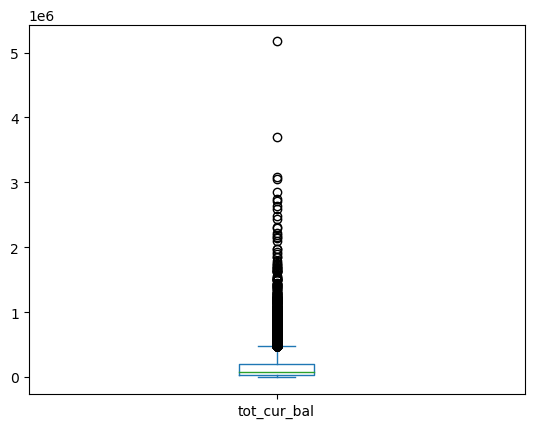

In [32]:
df['tot_cur_bal'].plot(kind = 'box')

In [34]:
df['tot_cur_bal'].value_counts()

0.0          22
22946.0       5
12213.0       5
51409.0       5
10772.0       5
             ..
288867.0      1
294866.0      1
34023.0       1
40420.0       1
3046776.0     1
Name: tot_cur_bal, Length: 65410, dtype: int64

<Axes: ylabel='Frequency'>

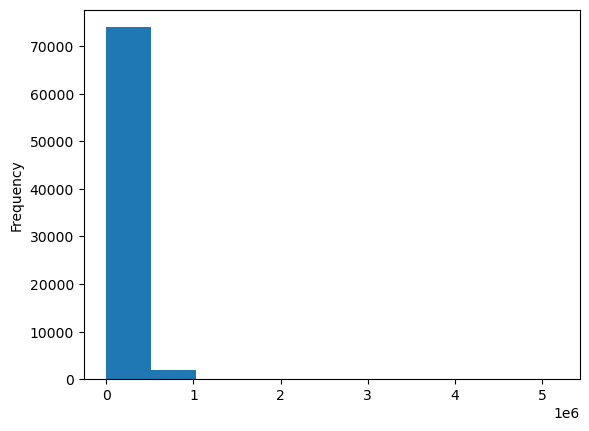

In [35]:
df['tot_cur_bal'].plot(kind = 'hist')

In [36]:
#Imputing with Mean due to oultiers
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(df['tot_cur_bal'].median())

revol_util

In [37]:
# Revolve util null perc so small- drop the null values
df = df[~df['revol_util'].isna()]

title

In [38]:
# Title
df['title'].nunique()
#High cardinality . so drop

5340

In [39]:
df['title'].unique()

array(['Debt consolidation', 'Credit Loan', 'Debt Connsolidation', ...,
       'cr card payoff', 'Debt in one place', 'Consolidate 2012'],
      dtype=object)

In [40]:
df['title'].value_counts()

Debt consolidation                  39378
Credit card refinancing             14799
Home improvement                     4533
Other                                4029
Major purchase                       1422
                                    ...  
CREDIT PAYMENT                          1
DebtConsolidate                         1
Card consolidation                      1
Purchase of an ultrasonic welder        1
Consolidate 2012                        1
Name: title, Length: 5340, dtype: int64

In [41]:
#title has too many diverse values and there is no clear pattern for distinction
# Dropping this column
df = df.drop(columns='title')

pub_rec_bankruptcies

In [42]:
# Revolve util null perc so small- drop
df = df[~df['pub_rec_bankruptcies'].isna()]

In [43]:
# Null Value Treatment complete
df.isna().sum()

addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
total_acc               0
verification_status     0
loan_status             0
dtype: int64

# EDA

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79916 entries, 0 to 79999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            79916 non-null  object 
 1   annual_inc            79916 non-null  float64
 2   earliest_cr_line      79916 non-null  object 
 3   emp_length            79916 non-null  int32  
 4   fico_range_high       79916 non-null  float64
 5   fico_range_low        79916 non-null  float64
 6   grade                 79916 non-null  object 
 7   home_ownership        79916 non-null  object 
 8   application_type      79916 non-null  object 
 9   initial_list_status   79916 non-null  object 
 10  int_rate              79916 non-null  float64
 11  loan_amnt             79916 non-null  float64
 12  num_actv_bc_tl        79916 non-null  float64
 13  mort_acc              79916 non-null  float64
 14  tot_cur_bal           79916 non-null  float64
 15  open_acc           

In [46]:
# Replacing Loan status with 1 and 0
df['loan_status'] = df['loan_status'].replace({'Fully Paid':1,'Charged Off':0})

In [47]:
# Checking Target value distribution
df['loan_status'].value_counts(normalize=True) * 100

1    80.03779
0    19.96221
Name: loan_status, dtype: float64

 We see approx 80/20 ratio for classification. no need to upsample/down sample

# Univariate Analysis

addr_state

In [48]:
# Checking state wise target variable distiribution

state_loan_status = pd.pivot_table(df,index='addr_state',columns='loan_status',aggfunc={'addr_state': "count"}).reset_index()

In [49]:
state_loan_status.columns = ['State','Failure','Success']

In [50]:
state_loan_status.columns

Index(['State', 'Failure', 'Success'], dtype='object')

In [51]:
state_loan_status['Success rate'] = state_loan_status['Success']/(state_loan_status['Failure']+state_loan_status['Success'])

<Axes: xlabel='State', ylabel='Success rate'>

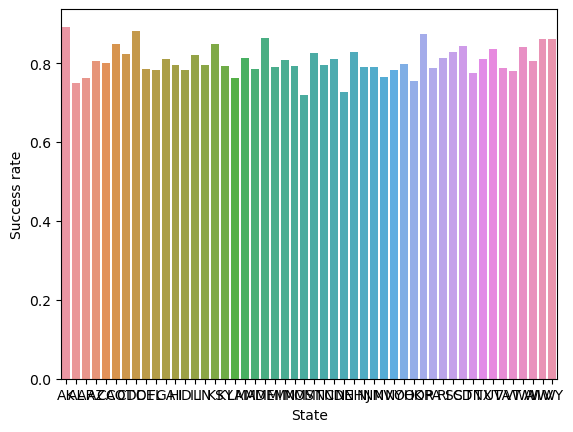

In [52]:
sns.barplot(state_loan_status,x='State',y='Success rate' )

We see that state address does not have much impact on credit default.
Hence dropping this column

In [53]:

df = df.drop(columns = 'addr_state')

In [54]:
df.columns


Index(['annual_inc', 'earliest_cr_line', 'emp_length', 'fico_range_high',
       'fico_range_low', 'grade', 'home_ownership', 'application_type',
       'initial_list_status', 'int_rate', 'loan_amnt', 'num_actv_bc_tl',
       'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'total_acc', 'verification_status', 'loan_status'],
      dtype='object')

earliest_cr_line

In [60]:
#Converting earliest_cr_line to datetime and checking the no. of months from current date
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [65]:
x = list(df['earliest_cr_line'])
x.sort()
x[-1]

Timestamp('2015-08-01 00:00:00')

In [69]:
#Assuming Jan 2016 as the base date
base_date = pd.to_datetime('Jan-2016')
df['no_months'] = ((base_date - df.earliest_cr_line)/np.timedelta64(1, 'M'))
df['no_months'] = round(df['no_months'])

<Axes: xlabel='no_months', ylabel='loan_status'>

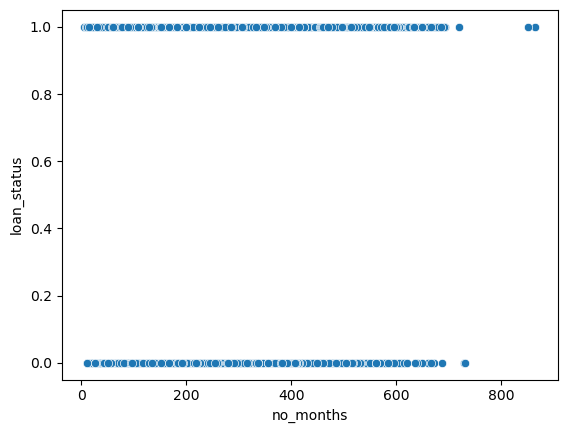

In [71]:
sns.scatterplot(x =df['no_months'],y=df['loan_status'])

In [72]:
#Dropping earliest_cr_line column
df = df.drop(columns='earliest_cr_line')

fico_range_high & fico_range_low

In [73]:
#Assigning FICO score into buckets
conditions_high= [(df['fico_range_high']<=580),(df['fico_range_high']<=669)&(df['fico_range_high']>580),(df['fico_range_high']<=739)&(df['fico_range_high']>669),(df['fico_range_high']<=800)&(df['fico_range_high']>739),(df['fico_range_high']>800)]
conditions_low= [(df['fico_range_low']<=580),(df['fico_range_low']<=669)&(df['fico_range_low']>580),(df['fico_range_low']<=739)&(df['fico_range_low']>669),(df['fico_range_low']<=800)&(df['fico_range_low']>739),(df['fico_range_low']>800)]
values = [1,2,3,4,5]
df['fico_high'] = np.select(conditions_high,values)
df['fico_low'] = np.select(conditions_low,values)

In [74]:
#Dropping fico_range_high and fico_range_low columns
df = df.drop(columns=['fico_range_high','fico_range_low'])

In [75]:
df.columns

Index(['annual_inc', 'emp_length', 'grade', 'home_ownership',
       'application_type', 'initial_list_status', 'int_rate', 'loan_amnt',
       'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'total_acc', 'verification_status', 'loan_status',
       'no_months', 'fico_high', 'fico_low'],
      dtype='object')

term

In [80]:
#Since only two possible values are present, assigning categorical label
df['term'] = df['term'].replace({' 60 months':'Long', ' 36 months':'Short'})

In [81]:
df['term'].unique()

array(['Long', 'Short'], dtype=object)

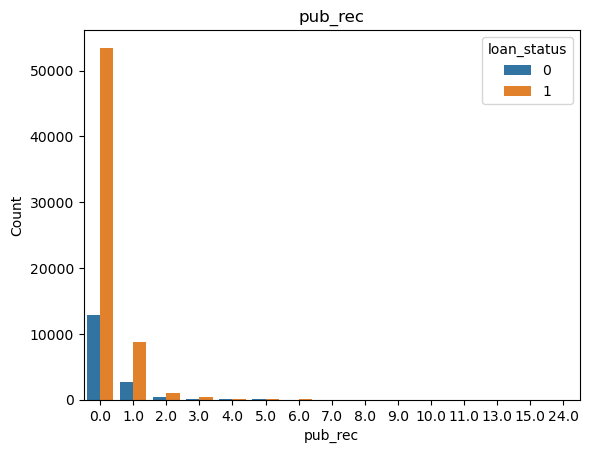

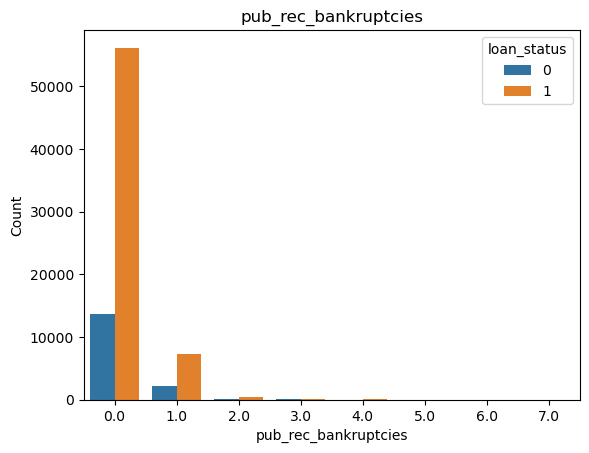

In [90]:
#Public records
for i in ['pub_rec','pub_rec_bankruptcies']:
    sns.countplot(df,x=i,hue='loan_status')
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

In [91]:
df['pub_rec'].value_counts(normalize=True)

0.0     0.829483
1.0     0.142562
2.0     0.017644
3.0     0.006144
4.0     0.002365
5.0     0.000901
6.0     0.000488
8.0     0.000150
7.0     0.000150
11.0    0.000038
10.0    0.000025
13.0    0.000013
24.0    0.000013
15.0    0.000013
9.0     0.000013
Name: pub_rec, dtype: float64

In [92]:
df['pub_rec_bankruptcies'].value_counts(normalize=True)

0.0    0.873555
1.0    0.118399
2.0    0.006044
3.0    0.001477
4.0    0.000413
5.0    0.000088
7.0    0.000013
6.0    0.000013
Name: pub_rec_bankruptcies, dtype: float64

In [93]:
#Purpose
df['purpose'].unique()

array(['debt_consolidation', 'home_improvement', 'credit_card', 'other',
       'small_business', 'medical', 'major_purchase', 'car', 'vacation',
       'house', 'moving', 'wedding', 'renewable_energy', 'educational'],
      dtype=object)

In [94]:
#verification_status
df['verification_status'].unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

For annual_inc,loan_amnt,tot_cur_bal,revol_bal Outlier treatment is not done because these are open ended figures.

In [102]:
# Bifurcating Numerical and Categorical columns

num_col = df.drop(columns='loan_status').select_dtypes(include=np.number).columns
cat_col = df.select_dtypes(exclude=np.number).columns

df_target = df[['loan_status']]
df_num = df[num_col]
df_cat = df[cat_col]

In [103]:
df_num.head()

,annual_inc,emp_length,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,no_months,fico_high,fico_low
0,85000.0,10,18.99,18075.0,1.0,1.0,319479.0,7.0,0.0,0.0,5338.0,93.6,8.0,222.0,4,4
1,40000.0,10,10.16,8800.0,4.0,0.0,19944.0,5.0,0.0,0.0,19944.0,60.3,12.0,345.0,3,3
2,60000.0,10,11.47,18000.0,4.0,2.0,23199.0,7.0,0.0,0.0,23199.0,88.5,16.0,101.0,3,3
3,100742.0,10,9.16,20000.0,4.0,1.0,72651.0,12.0,0.0,0.0,18425.0,69.0,19.0,424.0,2,2
4,80000.0,10,23.83,35000.0,14.0,7.0,64631.0,23.0,0.0,0.0,34370.0,90.0,59.0,198.0,2,2


In [104]:
df_cat.head()

,grade,home_ownership,application_type,initial_list_status,purpose,sub_grade,term,verification_status
0,E,MORTGAGE,Individual,w,debt_consolidation,E1,Long,Source Verified
1,B,RENT,Individual,w,debt_consolidation,B1,Short,Verified
2,B,MORTGAGE,Individual,w,debt_consolidation,B5,Short,Source Verified
3,B,MORTGAGE,Individual,w,debt_consolidation,B2,Short,Source Verified
4,F,RENT,Individual,f,debt_consolidation,F5,Long,Verified


In [105]:
df_target.head()

,loan_status
0,0
1,1
2,1
3,1
4,1


In [106]:
df_num.shape,df_cat.shape,df_target.shape

((79916, 16), (79916, 8), (79916, 1))

In [107]:
#Encoding Categorical Variables
df_cat2 = pd.get_dummies(df_cat)

In [109]:
df_cat2.columns

Index(['grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'application_type_Individual',
       'application_type_Joint App', 'initial_list_status_f',
       'initial_list_status_w', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'sub_grade_A1', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', '

In [110]:
df_cat2.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,...,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,term_Long,term_Short,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [114]:
min_max_scaler = preprocessing.MinMaxScaler()
df_num_scaled = min_max_scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled,columns=df_num.columns)

In [115]:
df_num_scaled

,annual_inc,emp_length,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,no_months,fico_high,fico_low
0,0.011902,1.0,0.532710,0.437821,0.03125,0.03125,0.061769,0.075949,0.000000,0.000000,0.005213,0.613368,0.03750,0.252619,0.666667,0.666667
1,0.005601,1.0,0.188863,0.200000,0.12500,0.00000,0.003856,0.050633,0.000000,0.000000,0.019478,0.395151,0.06250,0.395809,0.333333,0.333333
2,0.008401,1.0,0.239875,0.435897,0.12500,0.06250,0.004485,0.075949,0.000000,0.000000,0.022657,0.579948,0.08750,0.111758,0.333333,0.333333
3,0.014106,1.0,0.149922,0.487179,0.12500,0.03125,0.014046,0.139241,0.000000,0.000000,0.017994,0.452163,0.10625,0.487776,0.000000,0.000000
4,0.011202,1.0,0.721184,0.871795,0.43750,0.21875,0.012496,0.278481,0.000000,0.000000,0.033566,0.589777,0.35625,0.224680,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79911,0.011342,1.0,0.801402,0.637179,0.15625,0.12500,0.042636,0.139241,0.000000,0.000000,0.019729,0.612713,0.25000,0.216531,0.000000,0.000000
79912,0.006301,1.0,0.271807,0.153205,0.06250,0.06250,0.047520,0.075949,0.000000,0.000000,0.006001,0.372870,0.07500,0.279395,0.333333,0.333333
79913,0.012602,0.0,0.221184,0.153846,0.03125,0.09375,0.073910,0.101266,0.000000,0.000000,0.003819,0.167759,0.15000,0.144354,0.333333,0.333333
79914,0.013162,0.3,0.551402,0.435897,0.09375,0.09375,0.039024,0.189873,0.041667,0.142857,0.011619,0.323722,0.28750,0.325960,0.000000,0.000000


In [120]:
df_final = pd.concat([df_num_scaled.reset_index(drop=True),df_cat2.reset_index(drop=True),df_target.reset_index(drop=True)],axis=1)

In [121]:
df_final.shape

(79916, 88)

In [122]:
df_final.head()


,annual_inc,emp_length,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,...,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,term_Long,term_Short,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status
0,0.011902,1.0,0.532710,0.437821,0.03125,0.03125,0.061769,0.075949,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
1,0.005601,1.0,0.188863,0.200000,0.12500,0.00000,0.003856,0.050633,0.0,0.0,...,0,0,0,0,0,1,0,0,1,1
2,0.008401,1.0,0.239875,0.435897,0.12500,0.06250,0.004485,0.075949,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
3,0.014106,1.0,0.149922,0.487179,0.12500,0.03125,0.014046,0.139241,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
4,0.011202,1.0,0.721184,0.871795,0.43750,0.21875,0.012496,0.278481,0.0,0.0,...,0,0,0,0,1,0,0,0,1,1


# Modelling

In [374]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import xgboost as xgb
from sklearn.ensemble import VotingClassifier,StackingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report, f1_score
from imblearn.over_sampling import SMOTE

In [358]:
X = df_final.drop(columns='loan_status')
y = df_final['loan_status']

In [359]:

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=2)

In [360]:
test_y.value_counts(normalize=True)

1    0.799082
0    0.200918
Name: loan_status, dtype: float64

In [361]:
#Resampling 
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [362]:
X_resampled, y_resampled = smote.fit_resample(train_X, train_y)

In [363]:
y_resampled.value_counts()

1    44805
0    44805
Name: loan_status, dtype: int64

In [351]:
#train_X, test_X, train_y, test_y = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=2)

In [368]:
model = StackingClassifier(estimators=[
                                                ('rf', RandomForestClassifier()), 
                                                ('gmb', GradientBoostingClassifier())], 
                                     final_estimator=DecisionTreeClassifier())

In [369]:
model.fit(X_resampled, y_resampled)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('gmb', GradientBoostingClassifier())],
                   final_estimator=DecisionTreeClassifier())

In [370]:
#train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [135]:
f1_train = f1_score(train_y, train_pred)
print('F1 train Score: ', f1_train)
f1_test = f1_score(test_y, test_pred)
print('F1 train Score: ', f1_test)

F1 train Score:  0.888857749129199
F1 train Score:  0.8874865610246341


In [371]:
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.25      0.17      0.20      4817
           1       0.81      0.87      0.84     19158

    accuracy                           0.73     23975
   macro avg       0.53      0.52      0.52     23975
weighted avg       0.69      0.73      0.71     23975



In [372]:
rf_classifier = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [375]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='f1')

In [ ]:
grid_search.fit(X_resampled, y_resampled)

In [ ]:
best_rf_classifier = grid_search.best_estimator_

In [ ]:
y_pred = best_rf_classifier.predict(X_test)

In [145]:
model_ = {'Logistic': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Naive Bayes': GaussianNB(),
         'Decision Tree': DecisionTreeClassifier(),
         'RandomForest': RandomForestClassifier(),
         'AdaBoost': AdaBoostClassifier(),
         'GBM': GradientBoostingClassifier(),
         
         'Voting_hard': VotingClassifier(estimators=[('lr', LogisticRegression()), 
                                                ('rf', RandomForestClassifier()), 
                                                ('gmb', GradientBoostingClassifier())], 
                                    voting='hard'),
         'Voting_soft': VotingClassifier(estimators=[('lr', LogisticRegression()), 
                                                ('rf', RandomForestClassifier()), 
                                                ('gmb', GradientBoostingClassifier())], 
                                    voting='soft'),
         'Voting_soft_best_model': VotingClassifier(estimators=[
                                                ('rf', RandomForestClassifier()), 
                                                ('gmb', GradientBoostingClassifier())], 
                                    voting='soft'),
         'Stacking': StackingClassifier(estimators=[('lr', LogisticRegression()), 
                                                ('rf', RandomForestClassifier()), 
                                                ('gmb', GradientBoostingClassifier())], 
                                     final_estimator=LogisticRegression()),
         'Stacking_best_model': StackingClassifier(estimators=[
                                                ('rf', RandomForestClassifier()), 
                                                ('gmb', GradientBoostingClassifier())], 
                                     final_estimator=DecisionTreeClassifier()),
         'Stacking_best_model_best_final_estimator': StackingClassifier(estimators=[ 
                                                ('rf', RandomForestClassifier()), 
                                                ('gmb', GradientBoostingClassifier())], 
                                     final_estimator=RandomForestClassifier()),   
          
          
        }

In [151]:
res = []
for name, model in model_.items():
    print("Model : ",name)
    model.fit(train_X,train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    print("Train Classification Report : ",classification_report(train_y, train_pred))
    print("Test Classification Report : ",classification_report(test_y, test_pred))
    res.append([name,f1_score(train_y, train_pred), f1_score(test_y, test_pred)])
    

Model :  Logistic


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Classification Report :                precision    recall  f1-score   support

           0       0.52      0.04      0.07     11136
           1       0.81      0.99      0.89     44805

    accuracy                           0.80     55941
   macro avg       0.66      0.52      0.48     55941
weighted avg       0.75      0.80      0.73     55941

Test Classification Report :                precision    recall  f1-score   support

           0       0.50      0.04      0.07      4817
           1       0.80      0.99      0.89     19158

    accuracy                           0.80     23975
   macro avg       0.65      0.51      0.48     23975
weighted avg       0.74      0.80      0.72     23975

Model :  KNN
Train Classification Report :                precision    recall  f1-score   support

           0       0.66      0.31      0.42     11136
           1       0.85      0.96      0.90     44805

    accuracy                           0.83     55941
   macro avg       0.76

KeyboardInterrupt: 

In [152]:
res

[['Logistic', 0.888857749129199, 0.8874865610246341],
 ['KNN', 0.9010621043268979, 0.8657131699697355],
 ['Naive Bayes', 0.7840217152079819, 0.7832758178136497],
 ['Decision Tree', 1.0, 0.8060055939627421],
 ['RandomForest', 1.0, 0.8863930073544962]]

In [147]:
l = pd.read_csv('train_loan_data.csv')

# Test Data

In [299]:
test_df = pd.read_csv('test_loan_data.csv')

In [300]:
test_df_target = pd.read_csv('test_results.csv')
test_df_target['loan_status'] = test_df_target['loan_status'].replace({'Fully Paid':1,'Charged Off':0})

In [301]:
test_df.shape,test_df_target.shape

((20000, 27), (20000, 1))

In [302]:
test_df1 = pd.concat([test_df,test_df_target],axis=1)

In [303]:
test_df1.shape

(20000, 28)

In [304]:
# Data Prepartaion


test_df1.isna().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              1258
emp_title               1378
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          1011
mort_acc                 704
tot_cur_bal             1011
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      11
purpose                    0
revol_bal                  0
revol_util                13
sub_grade                  0
term                       0
title                    247
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [305]:
test_df2 = test_df1.drop(columns= ['addr_state','emp_title','title'])

In [306]:
#emp_length imputation
test_df2['emp_length'] = test_df2['emp_length'].fillna(test_df2['emp_length'].mode()[0])
test_df2['emp_length'].replace({'10+ years':'10','< 1 year':'0'},inplace =True)
test_df2['emp_length'] = test_df2['emp_length'].str.extract('(\d+)')
test_df2['emp_length'] = test_df2['emp_length'].astype(int)

In [307]:
test_df2['emp_length'].unique()

array([ 1, 10,  9,  0,  2,  4,  3,  8,  7,  5,  6])

In [308]:
#Imputing with Mode for num_actv_bc_tl
test_df2['num_actv_bc_tl'] = test_df2['num_actv_bc_tl'].fillna(test_df2['num_actv_bc_tl'].mode()[0])
test_df2['mort_acc'] = test_df2['mort_acc'].fillna(test_df2['mort_acc'].mode()[0])

In [309]:
#Imputing with Median for tot_cur_bal
test_df2['tot_cur_bal'] = test_df2['tot_cur_bal'].fillna(test_df2['tot_cur_bal'].median())

In [310]:
test_df2['revol_util'] = test_df2['revol_util'].fillna(test_df2['revol_util'].median())
test_df2['pub_rec_bankruptcies'] = test_df2['pub_rec_bankruptcies'].fillna(0)

In [311]:
test_df2.duplicated().sum()

0

In [312]:
test_df2.isna().sum()

annual_inc              0
earliest_cr_line        0
emp_length              0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
total_acc               0
verification_status     0
loan_status             0
dtype: int64

In [313]:
# Generating new column for earliest credit date diff

test_df2['earliest_cr_line'] = pd.to_datetime(test_df2['earliest_cr_line'])
#Assuming Jan 2016 as the base date
base_date = pd.to_datetime('Jan-2016')
test_df2['no_months'] = ((base_date - test_df2.earliest_cr_line)/np.timedelta64(1, 'M'))
test_df2['no_months'] = round(test_df2['no_months'])

In [314]:
#Dropping earliest_cr_line column
test_df2 = test_df2.drop(columns='earliest_cr_line')

In [315]:
#Assigning FICO score into buckets
conditions_high= [(test_df2['fico_range_high']<=580),(test_df2['fico_range_high']<=669)&(test_df2['fico_range_high']>580),(test_df2['fico_range_high']<=739)&(test_df2['fico_range_high']>669),(test_df2['fico_range_high']<=800)&(test_df2['fico_range_high']>739),(test_df2['fico_range_high']>800)]
conditions_low= [(test_df2['fico_range_low']<=580),(test_df2['fico_range_low']<=669)&(test_df2['fico_range_low']>580),(test_df2['fico_range_low']<=739)&(test_df2['fico_range_low']>669),(test_df2['fico_range_low']<=800)&(test_df2['fico_range_low']>739),(test_df2['fico_range_low']>800)]
values = [1,2,3,4,5]
test_df2['fico_high'] = np.select(conditions_high,values)
test_df2['fico_low'] = np.select(conditions_low,values)

In [316]:
test_df2 = test_df2.drop(columns=['fico_range_high','fico_range_low'])

In [317]:
#Since only two possible values are present, assigning categorical label
test_df2['term'] = test_df2['term'].replace({' 60 months':'Long', ' 36 months':'Short'})

In [318]:
test_df2['term'].unique()

array(['Short', 'Long'], dtype=object)

In [319]:
num_col_test = test_df2.drop(columns='loan_status').select_dtypes(include=np.number).columns
cat_col_test = test_df2.select_dtypes(exclude=np.number).columns

df_target_test = test_df2[['loan_status']]
df_num_test = test_df2[num_col_test]
df_cat_test = test_df2[cat_col_test]

In [320]:
df_target_test

,loan_status
0,1
1,1
2,1
3,0
4,1
...,...
19995,1
19996,1
19997,1
19998,1


In [321]:
df_num_test

,annual_inc,emp_length,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,no_months,fico_high,fico_low
0,50000.0,1,13.99,5000.0,1.0,0.0,33395.0,9.0,0.0,0.0,2568.0,9.8,11.0,44.0,3,3
1,92000.0,10,10.99,30000.0,2.0,2.0,229832.0,11.0,0.0,0.0,30394.0,75.4,35.0,169.0,3,3
2,89000.0,10,10.15,16000.0,5.0,2.0,181616.0,15.0,0.0,0.0,38400.0,75.3,41.0,322.0,3,3
3,33000.0,9,13.68,10000.0,6.0,0.0,30603.0,12.0,1.0,1.0,21224.0,69.4,16.0,134.0,3,3
4,35580.0,10,14.09,4000.0,2.0,4.0,124597.0,8.0,0.0,0.0,3471.0,39.4,19.0,227.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,38500.0,4,17.57,10000.0,1.0,0.0,30397.0,10.0,0.0,0.0,5816.0,60.0,10.0,64.0,3,3
19996,80000.0,3,18.92,18375.0,2.0,5.0,494439.0,9.0,0.0,0.0,13886.0,75.1,30.0,205.0,3,3
19997,95000.0,10,11.22,35000.0,2.0,4.0,284915.0,10.0,0.0,0.0,43166.0,60.7,29.0,236.0,3,3
19998,35000.0,10,7.89,5000.0,1.0,0.0,8205.0,9.0,0.0,0.0,1110.0,4.4,19.0,154.0,5,5


In [322]:
df_cat_test

,grade,home_ownership,application_type,initial_list_status,purpose,sub_grade,term,verification_status
0,C,OWN,Individual,f,debt_consolidation,C4,Short,Source Verified
1,B,RENT,Individual,f,debt_consolidation,B2,Short,Source Verified
2,B,MORTGAGE,Individual,w,credit_card,B2,Long,Not Verified
3,C,RENT,Individual,f,debt_consolidation,C1,Short,Not Verified
4,B,MORTGAGE,Individual,f,debt_consolidation,B5,Short,Verified
...,...,...,...,...,...,...,...,...
19995,D,RENT,Individual,w,debt_consolidation,D4,Short,Not Verified
19996,D,MORTGAGE,Individual,f,debt_consolidation,D4,Long,Source Verified
19997,B,MORTGAGE,Individual,f,debt_consolidation,B5,Short,Source Verified
19998,A,MORTGAGE,Individual,w,car,A5,Short,Not Verified


In [323]:
#Encoding Categorical Variables
df_cat_test2 = pd.get_dummies(df_cat_test)

In [324]:
#Scaling Numerical data
min_max_scaler = preprocessing.MinMaxScaler()
df_num_test_scaled = min_max_scaler.fit_transform(df_num_test)
df_num_test_scaled = pd.DataFrame(df_num_test_scaled,columns=df_num_test.columns)

In [325]:
df_test_final = pd.concat([df_num_test_scaled.reset_index(drop=True),df_cat_test2.reset_index(drop=True),df_target_test.reset_index(drop=True)],axis=1)

In [326]:
df_test_final.shape

(20000, 86)

In [327]:
df_test_final.columns


Index(['annual_inc', 'emp_length', 'int_rate', 'loan_amnt', 'num_actv_bc_tl',
       'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'total_acc',
       'no_months', 'fico_high', 'fico_low', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
       'application_type_Individual', 'application_type_Joint App',
       'initial_list_status_f', 'initial_list_status_w', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'sub_grade_A1', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_gra

In [328]:
[y for y in list(df_final.columns) if y not in list(df_test_final.columns)]

['home_ownership_NONE', 'home_ownership_OTHER']

In [329]:
#Creating blank columns
df_test_final['home_ownership_NONE'] = 0 
df_test_final['home_ownership_OTHER'] = 0

In [342]:
X_loan_test = df_test_final[train_X.columns]
y_loan_test = df_test_final['loan_status']

In [343]:
#model.fit(X_loan_test,y_loan_test)

In [356]:
loan_pred = model.predict(X_loan_test)

In [357]:
print(classification_report(y_loan_test, loan_pred))

              precision    recall  f1-score   support

           0       0.32      0.55      0.41      3993
           1       0.86      0.71      0.78     16007

    accuracy                           0.68     20000
   macro avg       0.59      0.63      0.59     20000
weighted avg       0.76      0.68      0.70     20000



In [338]:
X_loan_test.columns


Index(['annual_inc', 'emp_length', 'int_rate', 'loan_amnt', 'num_actv_bc_tl',
       'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'total_acc',
       'no_months', 'fico_high', 'fico_low', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
       'application_type_Individual', 'application_type_Joint App',
       'initial_list_status_f', 'initial_list_status_w', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'sub_grade_A1', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_gra

In [339]:
train_X.columns

Index(['annual_inc', 'emp_length', 'int_rate', 'loan_amnt', 'num_actv_bc_tl',
       'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'total_acc',
       'no_months', 'fico_high', 'fico_low', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'application_type_Individual', 'application_type_Joint App',
       'initial_list_status_f', 'initial_list_status_w', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'sub_grade_A1', 'sub_grade_A2',
       's

In [341]:
[y for y in list(X_loan_test.columns) if y not in list(train_X.columns)]

[]